In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("diabetes.csv")
df.head (10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [5]:
def showResult(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)

    plot_confusion_matrix(clf, X_test, y_test)  
    plt.show()
    
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))

In [6]:
## kNN - DT - RF

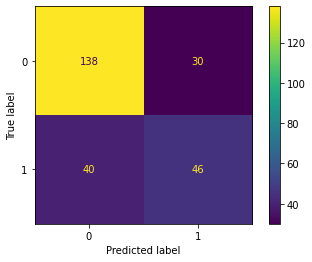

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       168
           1       0.61      0.53      0.57        86

    accuracy                           0.72       254
   macro avg       0.69      0.68      0.68       254
weighted avg       0.72      0.72      0.72       254



In [7]:
estimators = [
    ('knn', KNeighborsClassifier(n_neighbors=3)),
    ('dt', DecisionTreeClassifier(random_state=0))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator= RandomForestClassifier(n_estimators=10, random_state=42)
)

showResult(clf, X_train, y_train, X_test, y_test)

In [8]:
## kNN - RF - DT

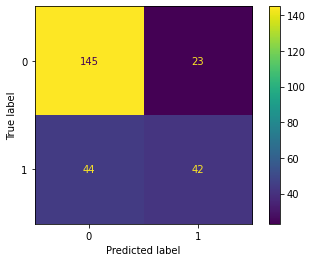

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       168
           1       0.65      0.49      0.56        86

    accuracy                           0.74       254
   macro avg       0.71      0.68      0.68       254
weighted avg       0.73      0.74      0.73       254



In [9]:
estimators = [
    ('knn', KNeighborsClassifier(n_neighbors=3)),
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator= DecisionTreeClassifier(random_state=0)
)

showResult(clf, X_train, y_train, X_test, y_test)

In [10]:
## DT - RF - kNN

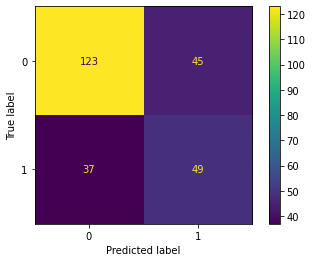

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       168
           1       0.52      0.57      0.54        86

    accuracy                           0.68       254
   macro avg       0.65      0.65      0.65       254
weighted avg       0.68      0.68      0.68       254



In [11]:
estimators = [
    ('dt', DecisionTreeClassifier(random_state=0)),
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator= KNeighborsClassifier(n_neighbors=3)
)

showResult(clf, X_train, y_train, X_test, y_test)